In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,12)
%matplotlib inline



In [11]:
BCfile='/users/eow/edwcom/CRUNCEP/soil_igbp_bc_cruncep_0p5deg_capUM6.6.nc'
VGfile='/users/eow/edwcom/CRUNCEP/soil_igbp_vg_cruncep_0p5deg_capUM6.6.nc'
latlonfile='/users/eow/edwcom/CRUNCEP/cru_ncep_land.nc'

In [12]:
BCinf=nc.Dataset(BCfile,'r')
BCdata={}
INvars=['bexp','sathh','satcon','vsat','vcrit','vwilt','hcap','hcon','albsoil']
BCvars=['b','sathh','satcon','sm_sat','sm_crit','sm_wilt','hcap','hcon','albsoil']
for INvar,var in zip(INvars,BCvars):
    BCdata[var]=BCinf.variables[str(INvar)][:]
BCinf.close()


In [13]:
VGinf=nc.Dataset(VGfile,'r')
VGdata={}
INvars=['bexp','sathh','satcon','vsat','vcrit','vwilt','hcap','hcon','albsoil']
VGvars=['b','sathh','satcon','sm_sat','sm_crit','sm_wilt','hcap','hcon','albsoil']
for INvar,var in zip(INvars,VGvars):
    VGdata[var]=VGinf.variables[str(INvar)][:]
VGinf.close()


In [23]:
LLinf=nc.Dataset(latlonfile,'r')
lat=LLinf.variables['Latitude'][:]
lon=LLinf.variables['Longitude'][:]

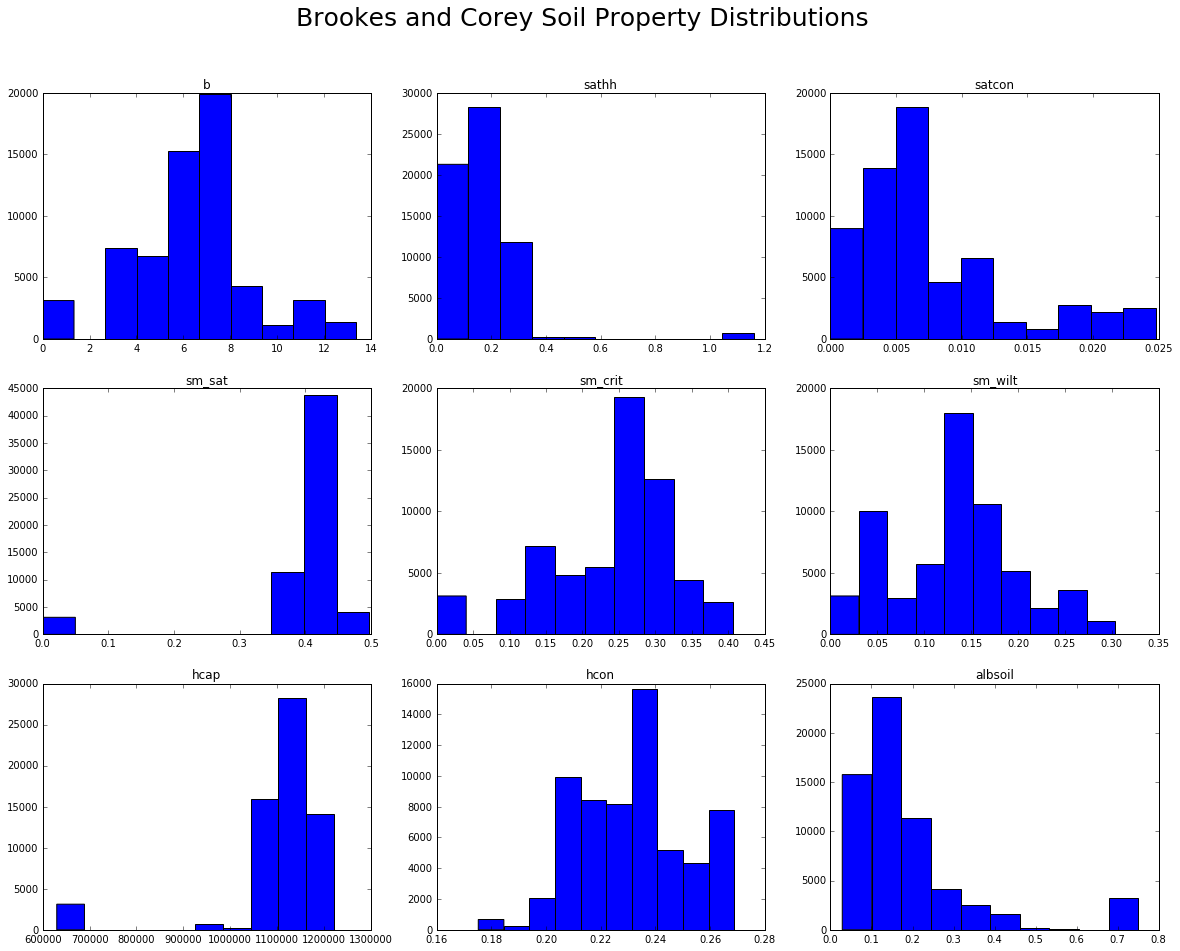

In [24]:
FIG,AXES=plt.subplots(nrows=3, ncols=3, figsize=(20,15))

for AX,var in zip(AXES.flat,BCvars):
    AX.hist(BCdata[var])
    AX.set_title(var)

FIG.suptitle('Brookes and Corey Soil Property Distributions',fontsize=25)

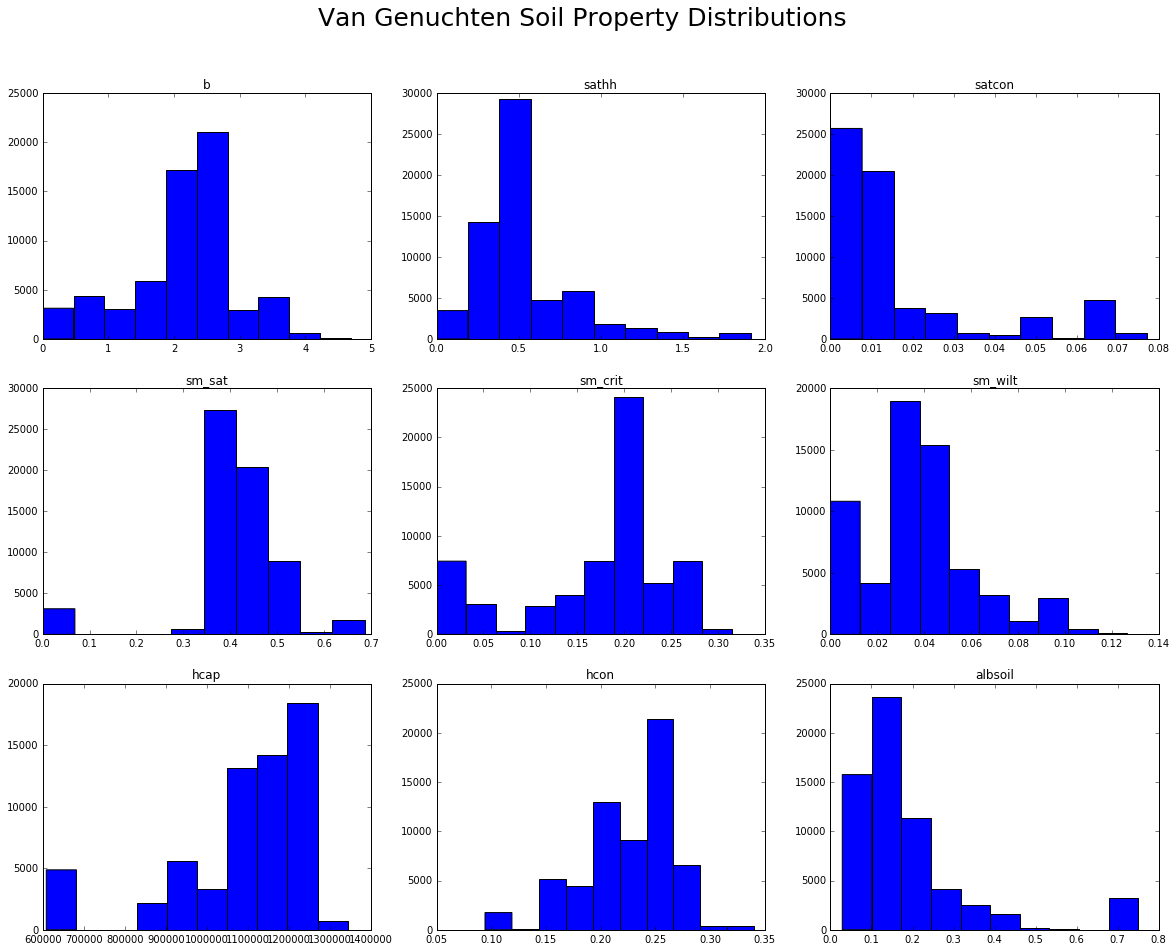

In [25]:
FIG,AXES=plt.subplots(nrows=3, ncols=3, figsize=(20,15))

for AX,var in zip(AXES.flat,VGvars):
    AX.hist(VGdata[var])
    AX.set_title(var)

FIG.suptitle('Van Genuchten Soil Property Distributions',fontsize=25)

In [26]:
site_lat,site_lon=38.9,-120.633

site_index=np.argmin( np.absolute(lat-site_lat)+np.absolute(lon-site_lon) )

print(site_index)
print(lat[site_index],lon[site_index])


2711
38.75 -120.75


In [27]:
for var,UMvar in zip(VGvars,UMvars):
    print(UMvar, var, VGdata[var][site_index])

bexp b 2.5549
sathh sathh 0.510595
satcon satcon 0.00594552
sm_sat sm_sat 0.415848
sm_crit sm_crit 0.19487
sm_wilt sm_wilt 0.0446135
hcap hcap 1.13442e+06
hcon hcon 0.230129
albsoil albsoil 0.17579


In [28]:
for var,INvar in zip(BCvars,INvars):
    print(INvar, var, BCdata[var][site_index])

bexp b 7.7434
sathh sathh 0.135002
satcon satcon 0.00536439
vsat sm_sat 0.417566
vcrit sm_crit 0.275661
vwilt sm_wilt 0.16839
hcap hcap 1.13109e+06
hcon hcon 0.228777
albsoil albsoil 0.17579


In [22]:
print(lat)


[-179.75 -179.75 -179.75 ...,  179.75  179.75  179.75]
